In [1]:
from featureranker.rankers import *
from featureranker.utils import *
from featureranker.plots import *

import pandas as pd
from sklearn.datasets import load_diabetes
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load and check data
diabetes = load_diabetes(as_frame=True)
df = diabetes.data.merge(diabetes.target, left_index=True, right_index=True)
view_data(df)
X, y = get_data(df, labels='target')

There are no NaN values in the dataset


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Fitting 3 folds for each of 5 candidates, totalling 15 fits


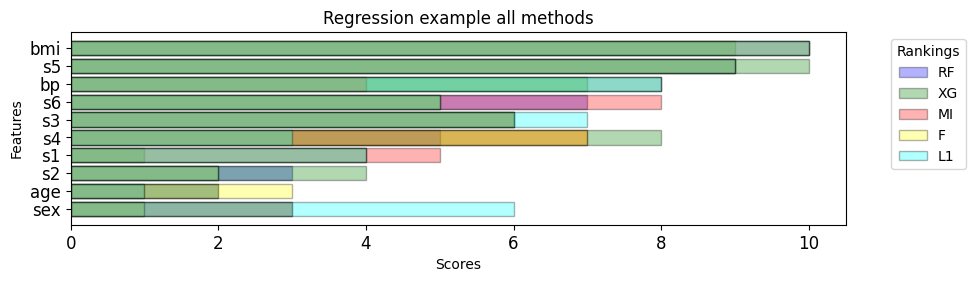

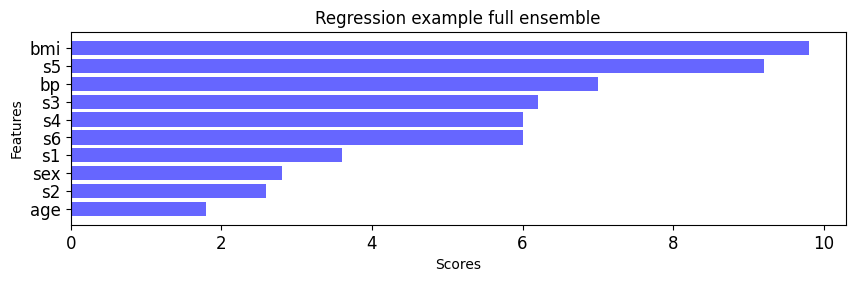

In [3]:
# Minimum settings
rankings = regression_ranking(X, y, predict=False)
scoring = voting(rankings)
plot_rankings(rankings, title='Regression example all methods')
plot_after_vote(scoring, title='Regression example full ensemble')

Fitting 3 folds for each of 5 candidates, totalling 15 fits


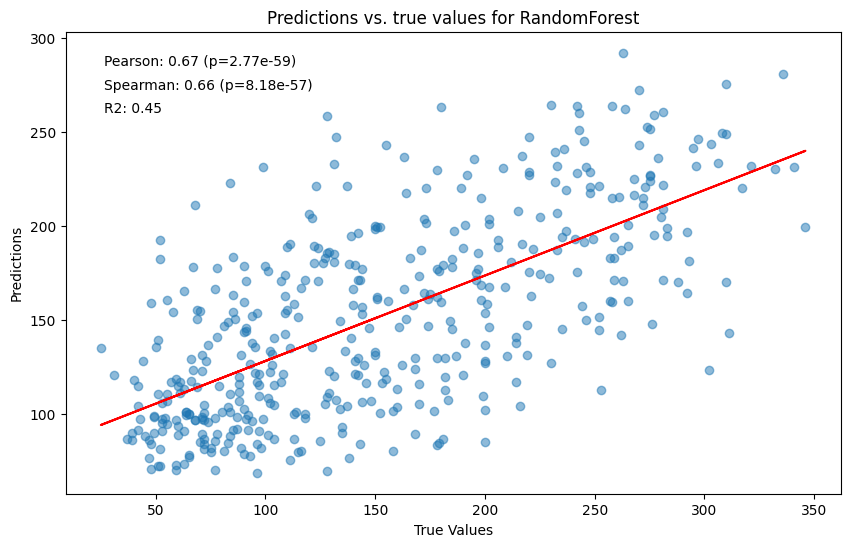

Fitting 3 folds for each of 5 candidates, totalling 15 fits


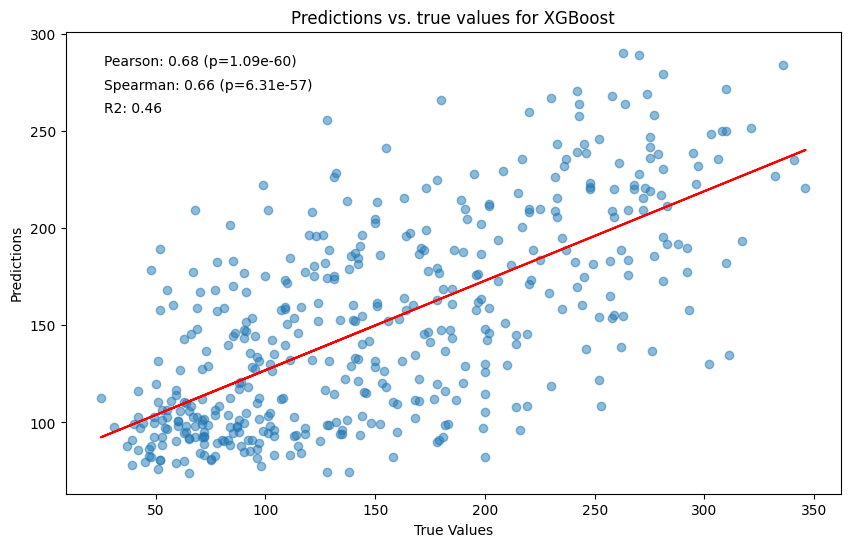

In [3]:
# See if methods capture variance
rankings = regression_ranking(X, y, predict=True)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


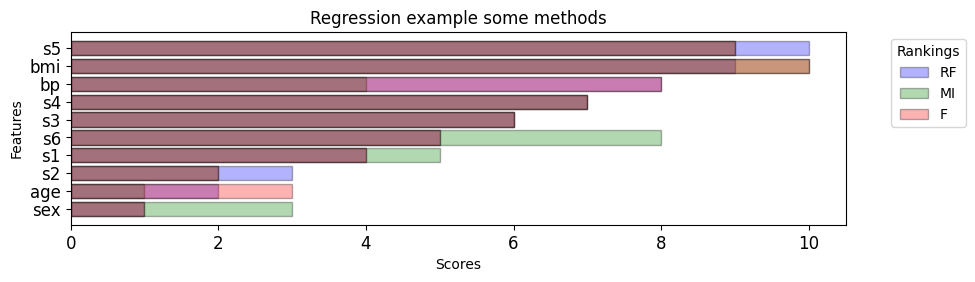

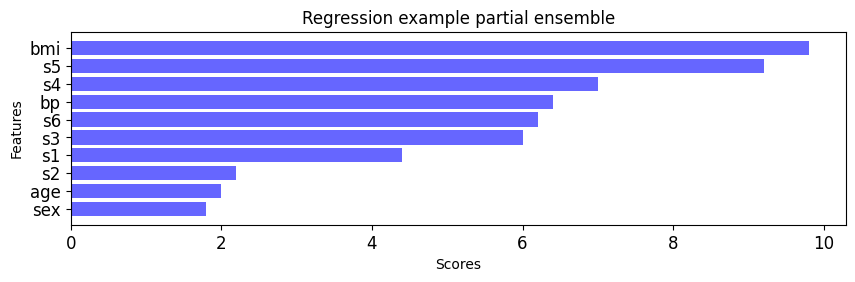

In [4]:
# Try different methods and different weights
rankings = regression_ranking(X, y, predict=False, choices=['mi', 'f_test', 'rf'])
scoring = voting(rankings, weights=(0.2, 0.4, 0.4))
plot_rankings(rankings, title='Regression example some methods')
plot_after_vote(scoring, title='Regression example partial ensemble')

Fitting 5 folds for each of 30 candidates, totalling 150 fits


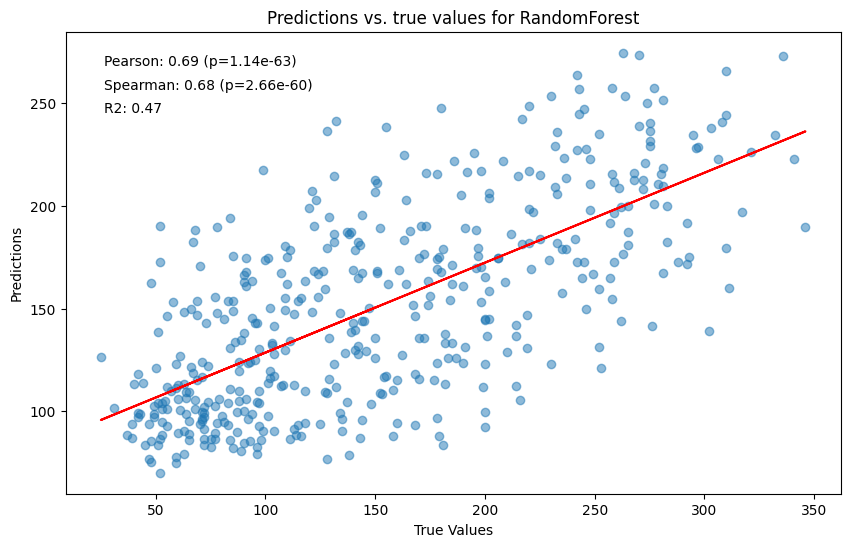

Fitting 5 folds for each of 30 candidates, totalling 150 fits


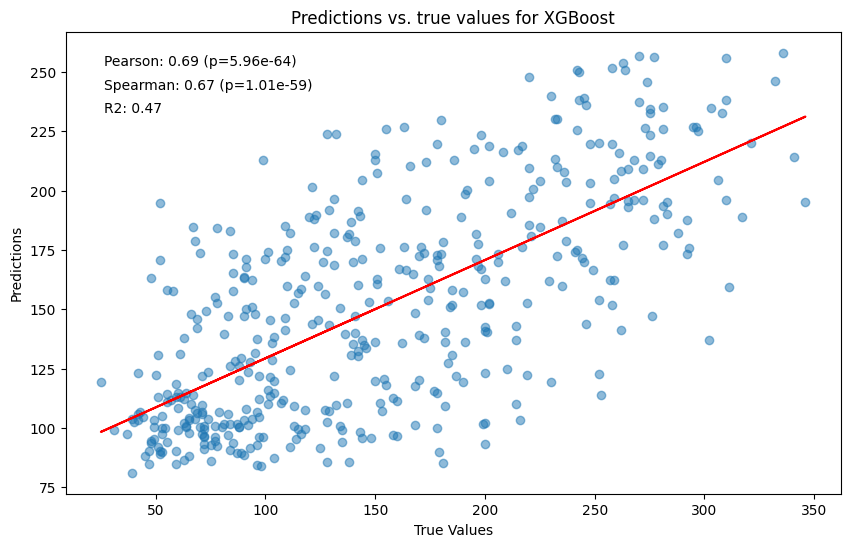

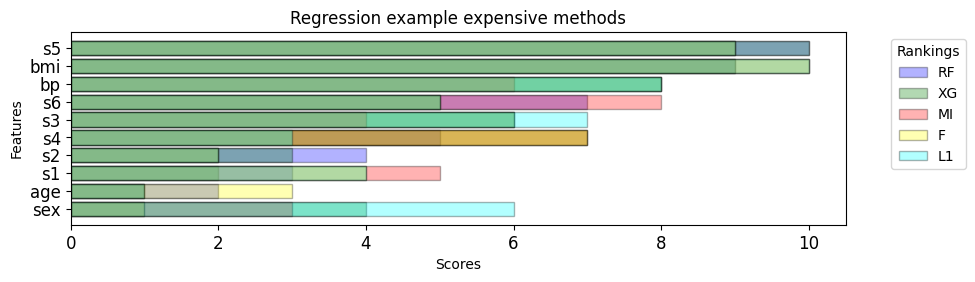

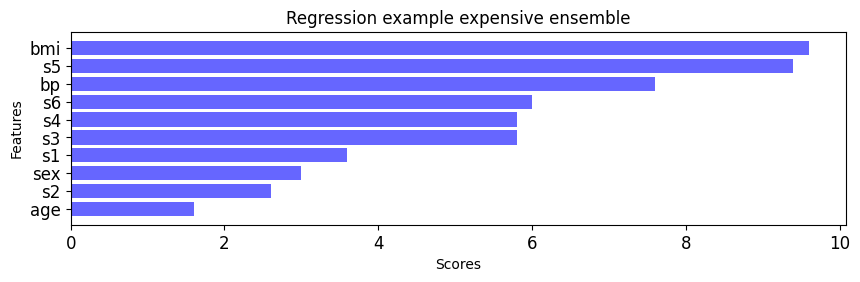

In [5]:
# Try a more thorough / expensive search
rankings = regression_ranking(X, y, cv=5, num_runs=30, scale=1e-30, num_alphas=10000, predict=True)
scoring = voting(rankings)
plot_rankings(rankings, title='Regression example expensive methods')
plot_after_vote(scoring, title='Regression example expensive ensemble')
# Performance is slighlty better (explains more variance) and more nuanced feature ranking towards the less influential features